# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dennita Noor Febianty
- **Email:** dennita3nf@gmail.com
- **ID Dicoding:** dennita_nf

## Menentukan Pertanyaan Bisnis

- What product is the most popular?
- What is the level of buyer satisfaction with the service?
- How is the monthly purchase order data

## Import Semua Packages/Library yang Digunakan

In [220]:
pip install Unidecode

In [221]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from unidecode import unidecode
from scipy import stats
import datetime as dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all data dan library that needed

## Data Wrangling

### Gathering Data

In [222]:
path = "/content/drive/MyDrive/Colab_Notebooks/E-Commerce_Public_Dataset/"

orders = pd.read_csv(path + 'orders_dataset.csv')
items = pd.read_csv(path + 'order_items_dataset.csv')
products = pd.read_csv(path + 'products_dataset.csv')
payments = pd.read_csv(path + 'order_payments_dataset.csv')
reviews = pd.read_csv(path + 'order_reviews_dataset.csv')
customers = pd.read_csv(path + 'customers_dataset.csv')
sellers = pd.read_csv(path + 'sellers_dataset.csv')
geo = pd.read_csv(path + 'geolocation_dataset.csv')
category = pd.read_csv(path + 'product_category_name_translation.csv')

In [223]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [224]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [225]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [226]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [227]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [228]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [229]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [230]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [231]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

1.   Orders Dataset:
  - Provides information about order details like order ID, customer ID, order status, purchase timestamp, etc.
 - Can be used to calculate the total number of transactions by filtering the data to only include transactions made in one year

2.  Order Items Dataset:
 - Contains information about the items within each order, including product ID, seller ID, price, shipping cost, etc.
 - Can be used to calculate the correlation between the selling price and sales rate

3. Products Dataset:
 - Provides information about individual product details, such as product category, description, photos, etc.
 - Can be used to identify popular product categories, analyze product-related trends, and understand product characteristics.

4. Order Payments Dataset:
 - Provides information on payment methods and payment values used for each order.
 - Useful for analyzing payment trends, preferred payment methods, and payment success rate.

5. Order Reviews Dataset:
 - Contains customer reviews and ratings for orders.

6. Customers Dataset:
 - Contains customer information, such as unique customer ID, zip code, city, state.
 - Can be used to identify the city with the most customers by grouping the data by city and counting the number of customers

7. Sellers Dataset:
 - Provides details about individual sellers, such as seller ID, zip code, city, state.

8. Geolocation Dataset:
 - Contains latitude and longitude for zip codes, cities, and states.
 - Can be used for creating maps, analyzing geographical distribution, and understanding geographical relationships.

9. Product Category Name Translation Dataset:
 - Translates the product category names from Portuguese to English.


### Assessing Data

In [232]:
data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geo,
        'category': category}


for i, df in data.items():
  print('\n', data[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [233]:
duplicate_counts = {}
total_sample_counts = {}

for i, df in data.items():
    duplicate_counts[i] = df.duplicated().sum()
    total_sample_counts[i] = len(df)


counts_duplicate = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['The duplicate data'])
total_data = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Data Count'])


pd.concat([total_data, counts_duplicate], axis=1)

,Total Data Count,The duplicate data
orders,99441,0
items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
sellers,3095,0
geo,1000163,261831
category,71,0


In [234]:
missing_counts = {}


for i, df in data.items():
    missing_counts[i] = df.isna().sum()
    print(i, '\n', missing_counts[i], '\n')


orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

**Insight:**
1. Total Number of Transactions:
 - The orders dataset contains 99441 entries, represents the total number of transactions made by customers.
 - To calculate the total number of transactions made by customers in one year, filter the data to only include transactions made in a specific year.

2. City with the Most Customers:
 - The customers dataset contains 99441 entries, represents the total number of customers.
 - To find the city with the most customers, group the data by customer_city and count the number of customers in each city.
 - The city with the highest count will be the city with the most customers.

3. Selling Price and Sales Rate:
 - The order_items dataset contains 112650 entries, represents the total number of order items.
 - To determine if the selling price of a product affects the sales rate, calculate the correlation between the price column and the freight_value column.
 - A high correlation between the two columns would indicate that the selling price of a product affects the sales rate.

### Cleaning Data

In [235]:
for i, df in data.items():
  print('\n', data[i].isnull().sum())


 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 review_id              

In [236]:
orders["order_approved_at"].fillna("No Date", inplace=True)
orders["order_delivered_carrier_date"].fillna("No Date", inplace=True)
orders["order_delivered_customer_date"].fillna("No Date", inplace=True)

In [237]:
reviews["review_comment_title"].fillna("No Title", inplace=True)
reviews["review_comment_message"].fillna("No Message", inplace=True)

In [238]:
order_review=['review_creation_date','review_answer_timestamp']
for col in order_review:
    reviews[col]=pd.to_datetime(reviews[col])

In [239]:
order_item=['shipping_limit_date']
for col in order_item:
    items[col]=pd.to_datetime(items[col])

In [240]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders['year'] = orders['order_purchase_timestamp'].dt.year

print('\n', orders['year'].value_counts())


 year
2018    54011
2017    45101
2016      329
Name: count, dtype: int64


In [241]:
print('\n', geo.duplicated().sum())


 261831


drop the duplicate value in "geo"


In [242]:
geo.drop_duplicates(inplace=True)

print('\n', geo.duplicated().sum())


 0


**Insight:**<br>
Cleaning the data:
- drop the duplicate data
- replace Null data with some message
- replace string to datetime type

## Exploratory Data Analysis (EDA)

### Explore ...

In [243]:
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [244]:
customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [245]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [246]:
(geo['geolocation_city']=='são paulo').sum()


19718

change the format of the value for 'geolocation_city' so that the all format are the same

In [247]:
geo['geolocation_city']=geo['geolocation_city'].apply(lambda x: unidecode(x))


In [248]:
(geo['geolocation_city']=='são paulo').sum()

0

In [249]:
geo.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()


,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6345,jordao,CE,1
6346,silves,AM,1
6347,california da barra (barra do pirai),RJ,1
6348,calheiros,RJ,1


In [250]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


to show what is the most used to payments

In [251]:
payments.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [252]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [253]:
orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018


In [254]:
marged_products=pd.merge(
    left=products,
    right=category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [255]:
col = marged_products.pop('product_category_name_english')
marged_products.insert(2, col.name, col)
marged_products.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [256]:
payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
77284,5f4a120717a4d152577d7d2ec66c45be,1,credit_card,3,201.34
2726,dad751910ee8793efe38a28bd04cf1d8,1,boleto,1,86.04
69611,e6e4c9655778e65e9552db273eff3852,1,credit_card,8,620.82
53152,2631afe2c28beb1d0b168915054a952b,1,boleto,1,90.66
76243,7c7b50bf10378ca615ca44f0413bc73b,1,credit_card,3,214.46
8956,9c48af0db9cf0d3d5fde3bbf1b9381c7,1,credit_card,8,86.18
6160,4ba4f54f9d165d6e980bdfdf8b4c4d11,1,credit_card,1,79.62
22199,ddbee74a2a5acaf9c9c17fb5671e13a9,1,credit_card,2,561.64
99078,5ad3a75d349361186b25fceeffb7a6fd,1,credit_card,7,206.87
12668,fc124eec9edbb799119308d21bfaea54,1,boleto,1,816.36


In [257]:
sellers.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2617,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP
2666,5b85809efd0d0e4dea1a9544e1280ed9,19020,presidente prudente,SP
682,96e5dc09087bad639b4ee193104ec2e5,28660,bom jardim,RJ
1031,0bb27263628258b8111a0262769fa9db,3077,sao paulo,SP
752,07d75e33f2750d97d467fb57e4dfdd8a,2117,sao paulo,SP
2491,b33e7c55446eabf8fe1a42d037ac7d6d,14850,pradopolis,SP
585,08084d990eb3f53af056ccbc1730c8a7,3612,sao paulo,SP
65,b7e1750c1157341d2abd0251e07c186b,5741,sao paulo,SP
1529,7ddcbb64b5bc1ef36ca8c151f6ec77df,4403,sao paulo,SP
2911,d101c6da914ae3d53f7bee42283f2fe2,8072,sao paulo,SP


To merge all data

In [258]:
merge1=pd.merge(
    left=orders,
    right=payments,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018,1.0,credit_card,8.0,252.25


In [259]:
merge2=pd.merge(
    left=merge1,
    right=items,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [260]:
merge3=pd.merge(
    left=merge2,
    right=marged_products,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
merge3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [261]:
merge4=pd.merge(
    left=merge3,
    right=sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
merge4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [262]:
pd.set_option('display.max_columns', None)

all_data=pd.merge(
    left=merge4,
    right=reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b5

In [263]:
all_data.describe()

,customer_zip_code_prefix,order_purchase_timestamp,year,payment_sequential,payment_installments,payment_value,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,119143.000000,119140.000000,119140.000000,119140.000000,118310.000000,118310,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017.535290,1.094737,2.941246,172.735135,1.196543,2018-01-05 22:06:13.308807680,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016.000000,1.000000,0.000000,0.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017.000000,1.000000,1.000000,60.850000,1.000000,2017-09-18 14:30:33,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018.000000,1.000000,2.000000,108.160000,1.000000,2018-01-25 04:11:15.500000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018.000000,1.000000,4.000000,189.240000,1.000000,2018-05-10 02:51:40.249999872,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018.000000,29.000000,24.000000,13664.080000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,0.505591,0.730141,2.777848,267.776077,0.699489,NaN,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,NaN,NaN


In [264]:
order_2018 = orders[orders['year'] == 2018]

total_transactions_2018 = len(order_2018)

print('Total number of transactions made by customers in 2018:', total_transactions_2018)

Total number of transactions made by customers in 2018: 54011


In [265]:
city_customers = customers['customer_city'].value_counts()

print(city_customers.head(13))

most_customers_city = city_customers.idxmax()

print()
print(f'City with the most customers is {most_customers_city} with {city_customers.max()} customers.')


customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
Name: count, dtype: int64

City with the most customers is sao paulo with 15540 customers.


**Insight:**
- Total customers in 2018 are : 54011.
- City with the most customers is sao paulo with 15540 customers.


The most popular products

In [266]:
product_counts = all_data.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_counts_product = product_counts.sort_values(by='product_id', ascending=False)

sorted_counts_product

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


RFM

In [267]:
all_data['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [268]:
all_data['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [269]:
#Y-M-D
date_now=dt.datetime(2018,9,9)


In [270]:
all_data['order_purchase_timestamp'].max()


Timestamp('2018-10-17 17:30:18')

In [271]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

recency = (date_now - all_data.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days.abs()
frequency = all_data.groupby('customer_id')['order_id'].count()
monetary = all_data.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [272]:
list_col = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = list_col

In [273]:
rfm.sort_values(by='customer_id',ascending=True)

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,298,1,89.80
1,000161a058600d5901f007fab4c27140,419,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,557,1,179.99
3,0002414f95344307404f0ace7a26f1d5,388,1,149.90
4,000379cdec625522490c315e70c7a9fb,159,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,163,3,164.70
99437,fffeda5b6d849fbd39689bb92087f431,109,1,47.90
99438,ffff42319e9b2d713724ae527742af25,87,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,371,2,21.80


In [274]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


customer with the last time spent

In [275]:
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
91429,ead83a4f8f7be8c3034b2e98754a6147,2,1,0.00
18248,2f0524a7b1b3845a1a57fcf3910c4333,2,1,0.00
60,002b5342c72978cf0aba6aae1f5d5293,2,1,0.00
21291,36b182c39933d55e307096ccc3fd2970,2,1,0.00
98897,fea4d57ed3a45455f89c25ef3dae8ee8,3,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,706,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,723,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,725,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,733,1,59.50


customer with the most shopping spend

In [276]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,396,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,350,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,506,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,458,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,119,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,217,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,417,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,123,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,496,1,139.90


Total amount of profit based on the city of each product category

In [277]:
all_data.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195263.02
                 bed_bath_table                   184140.58
                 watches_gifts                    172269.07
                 sports_leisure                   154139.05
                 computers_accessories            147079.12
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

See the level of buyer satisfaction with the service

In [278]:
all_data.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=True,by='review_score')


,review_score,customer_id
0,1.0,15428
1,2.0,4162
2,3.0,9894
3,4.0,22319
4,5.0,66343


In [279]:
all_data=pd.merge(
    left=all_data,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)

Monthly purchase data

In [280]:
all_data['order_approved_at'] = pd.to_datetime(all_data['order_approved_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

total_spend = all_data.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})
total_spend = total_spend.reset_index()
total_spend.rename(columns={
            "price": "total_cust_spend"
        }, inplace=True)

total_spend

,order_approved_at,total_cust_spend
0,2016-09-30,134.97
1,2016-10-31,51201.31
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,124313.26
5,2017-02-28,262281.82
6,2017-03-31,394384.70
7,2017-04-30,390306.86
8,2017-05-31,550323.59
9,2017-06-30,461045.05


In [281]:
total_spend = total_spend.reset_index()
total_spend['order_approved_at'] = total_spend['order_approved_at'].dt.strftime('%B')

total_spend

,index,order_approved_at,total_cust_spend
0,0,September,134.97
1,1,October,51201.31
2,2,November,0.00
3,3,December,10.90
4,4,January,124313.26
5,5,February,262281.82
6,6,March,394384.70
7,7,April,390306.86
8,8,May,550323.59
9,9,June,461045.05


In [282]:
total_spend = total_spend.sort_values('total_cust_spend').drop_duplicates('order_approved_at', keep='last')
total_spend

,index,order_approved_at,total_cust_spend
12,12,September,654698.76
13,13,October,704026.32
15,15,December,795824.02
17,17,February,882417.57
22,22,July,908431.56
23,23,August,909806.29
21,21,June,914410.56
16,16,January,986284.61
19,19,April,1010481.51
14,14,November,1039022.61


In [283]:
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

total_spend['month_cat'] = pd.Categorical(total_spend['order_approved_at'], categories=monthly_order, ordered=True)

sorted_montly_order = total_spend.sort_values(by='month_cat')

sorted_montly_order = sorted_montly_order.drop(columns=['month_cat'])

print(sorted_montly_order)

    index order_approved_at  total_cust_spend
16     16           January         986284.61
17     17          February         882417.57
18     18             March        1039716.71
19     19             April        1010481.51
20     20               May        1056093.87
21     21              June         914410.56
22     22              July         908431.56
23     23            August         909806.29
12     12         September         654698.76
13     13           October         704026.32
14     14          November        1039022.61
15     15          December         795824.02


In [284]:
total_spend = total_spend.sort_values('total_cust_spend').drop_duplicates('order_approved_at', keep='last')
total_spend

,index,order_approved_at,total_cust_spend,month_cat
12,12,September,654698.76,September
13,13,October,704026.32,October
15,15,December,795824.02,December
17,17,February,882417.57,February
22,22,July,908431.56,July
23,23,August,909806.29,August
21,21,June,914410.56,June
16,16,January,986284.61,January
19,19,April,1010481.51,April
14,14,November,1039022.61,November


Total spend

In [286]:
total_spend['total_cust_spend'].sum()

10901214.39

Average spend

In [288]:
total_spend['total_cust_spend'].mean()


908434.5325000001

Total monthly spend

In [289]:
monthly = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly

,order_id
order_approved_at,
2016-09-30,3
2016-10-31,398
2016-11-30,0
2016-12-31,1
2017-01-31,984
2017-02-28,2104
2017-03-31,3263
2017-04-30,2845
2017-05-31,4471


In [290]:
monthly.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

change the format of data

In [291]:
monthly.index = monthly.index.strftime('%B')
monthly = monthly.reset_index()
monthly.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly

,order_approved_at,order_count
0,September,3
1,October,398
2,November,0
3,December,1
4,January,984
5,February,2104
6,March,3263
7,April,2845
8,May,4471
9,June,3863


In [292]:
monthly = monthly.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

monthly

,order_approved_at,order_count
12,September,5211
13,October,5630
15,December,6846
22,July,7234
21,June,7391
23,August,7672
17,February,8041
19,April,8075
20,May,8497
16,January,8541


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [293]:
all_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40,480,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29,239,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59,112,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47,179,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,41,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20

In [294]:
sorted_counts_product

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


<ipython-input-303-54ebcb4ef645>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_counts_product.head(10), palette=colors, ax=ax[0])
<ipython-input-303-54ebcb4ef645>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_counts_product.sort_values(by="product_id", ascending=True).head(10), palette=colors, ax=ax[1])


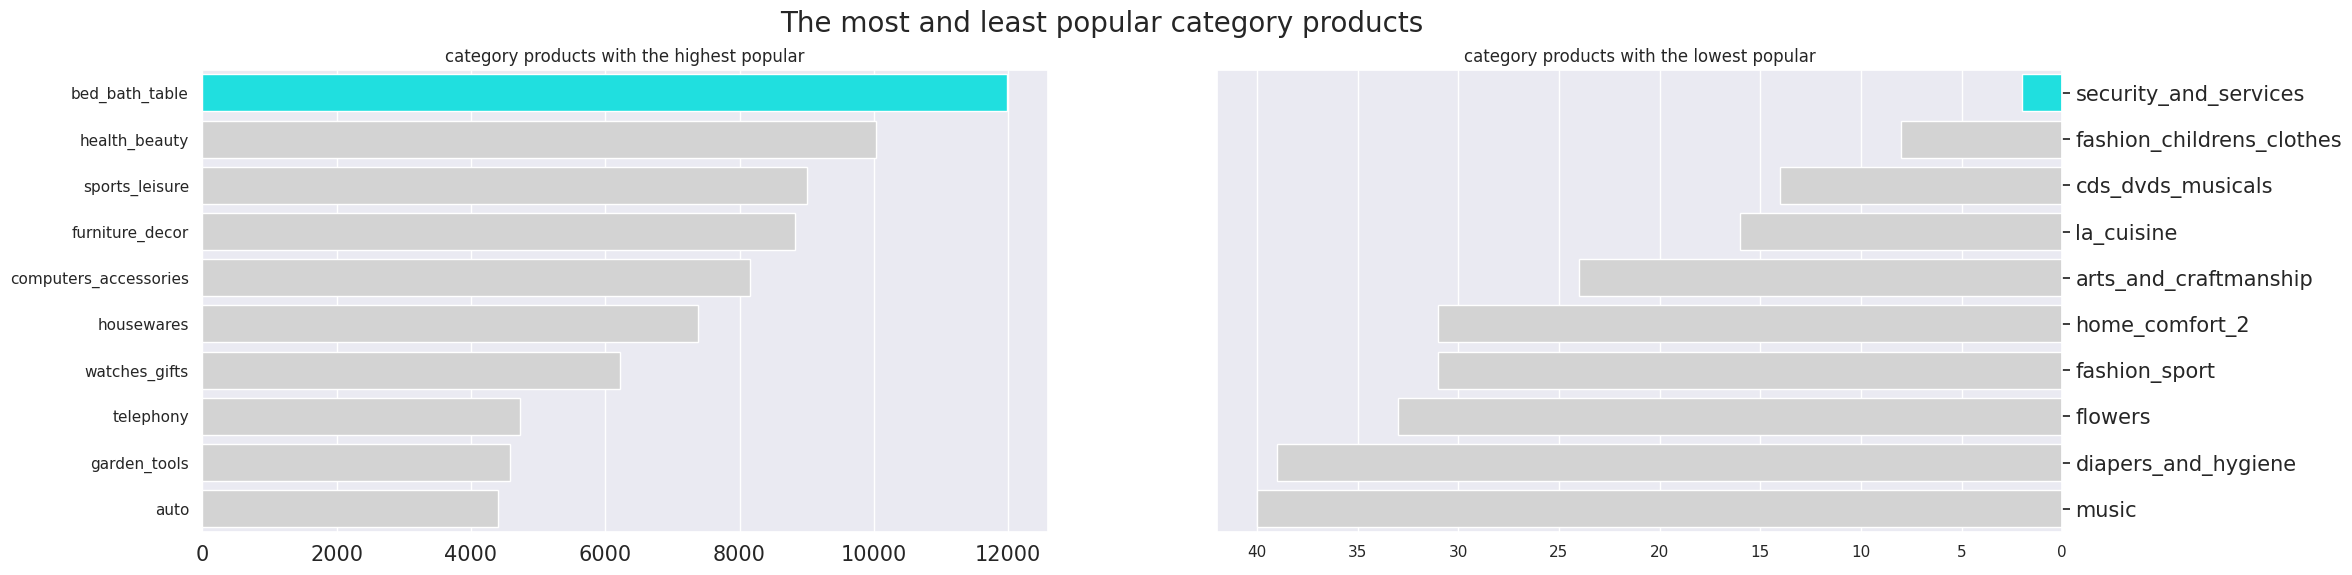

In [303]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#00FFFF"] + ["#D3D3D3"] * 9

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_counts_product.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("category products with the highest popular", loc="center")
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_counts_product.sort_values(by="product_id", ascending=True).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("category products with the lowest popular", loc="center")
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("The most and least popular category products", fontsize=20)
plt.show()

**Insight:** <br>
The most popular product category is the bed_bath_table product. Followed by health_beauty products.
The least sold product category is security_and_service.

### Pertanyaan 2:

In [296]:
i = all_data['review_score'].value_counts().sort_values(ascending=False)
i.index
i.values

array([66343, 22319, 15428,  9894,  4162])

<ipython-input-297-752d364ec882>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_score.index,


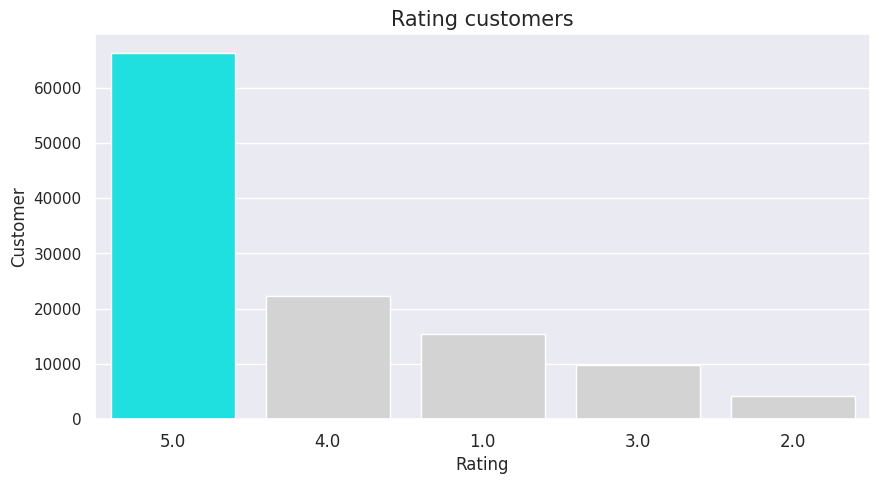

In [297]:
rating_score = all_data['review_score'].value_counts().sort_values(ascending=False)

max_score = rating_score.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_score.index,
            y=rating_score.values,
            order=rating_score.index,
            palette=["#00FFFF" if score == max_score else "#D3D3D3" for score in rating_score.index]
            )

plt.title("Rating customers", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()


**Insight:** <br>
The dominant value of customer ratings on e-commers is 5. Then for the least rating value is 2.

### Pertanyaan 3:

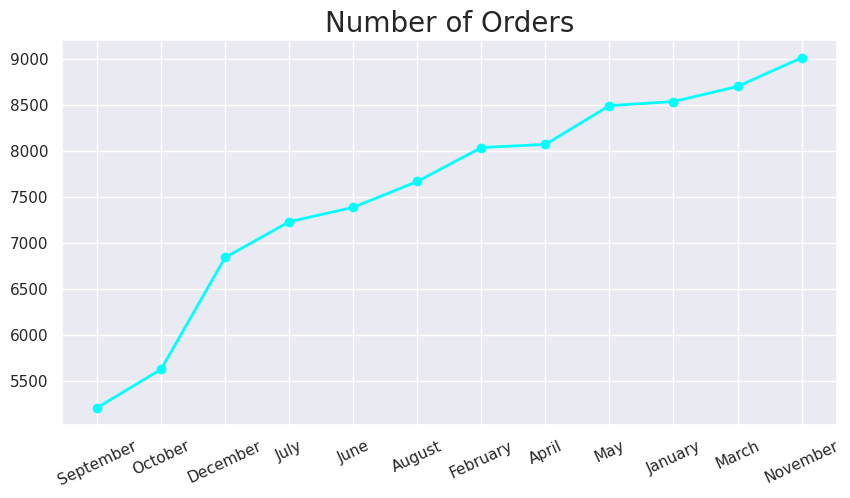

In [302]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly["order_approved_at"],
    monthly["order_count"],
    marker='o',
    linewidth=2,
    color="#00FFFF"
)
plt.title("Number of Orders", loc="center", fontsize=20)
plt.xticks(rotation=25)
plt.yticks()
plt.show()


**Insight:** <br>
Based on the data in the graph, the number of customers spent per month can vary and is not significant. The month that has the highest amount of spend is November, while the month that has the least spend is September.

RFM

<ipython-input-300-d02d5657829f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-300-d02d5657829f>:5: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-300-d02d5657829f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels())
<ipython-input-300-d02d5657829f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

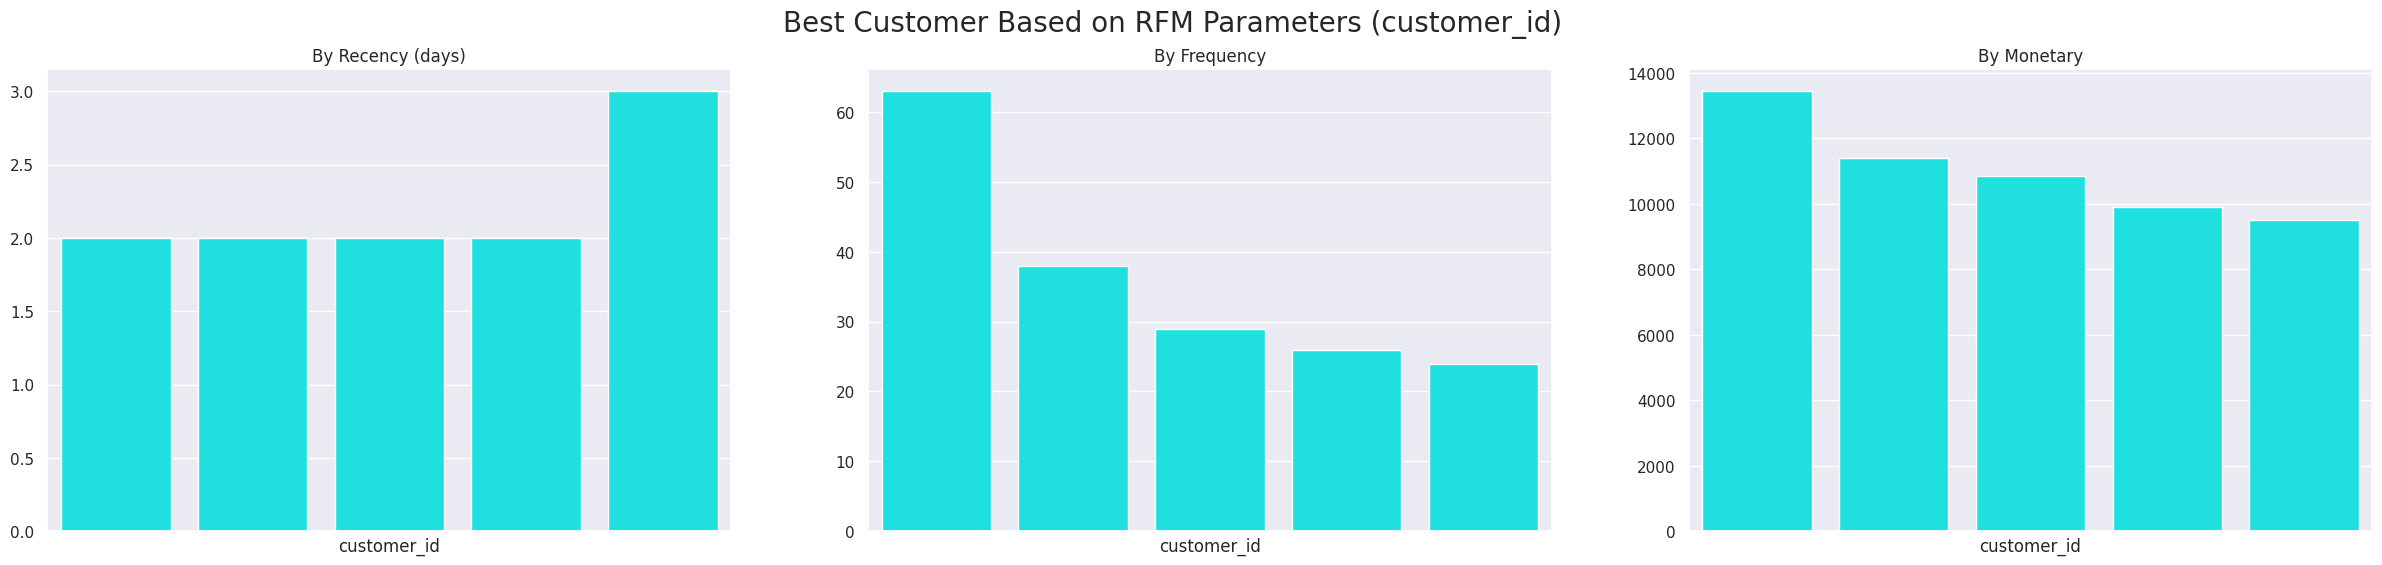

In [300]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#00FFFF"]

sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center")
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels())
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center")
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels())
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center")
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels())
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [304]:
all_data.to_csv("all_data.csv", index=False)


## Conclusion

- Conclution pertanyaan 1
  - The most popular product sold is beth_bad_table with a total of 12000 sales. We can see that in the data visualization.
- Conclution pertanyaan 2
  - The level of satisfaction of some customers is satisfactory, this can be proven based on visualized data, the rating value of most customers gives a perfect value of 5.
- Conclution pertanyaan 3
  - Customer purchases are dynamic in other words, the value of customer purchases every month there is an increase and sometimes there's a decrease. This is based on related data, the peak of maximum customer purchases is in November and the peak of minimum customer purchases is in September.